In [6]:
import datetime
import os
import platform
from model_evaluation_utils import training_evaluation
from model_utils import create_phase1_model
from plot_keras_history import show_history, plot_history


In [7]:
phase1_model = create_phase1_model()
history, phase1_model, results = training_evaluation(phase1_model, 1)

2023-08-07 16:55:01.539344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 16:55:01.539506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


2023-08-07 16:55:06.061495: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-07 16:55:07.771972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-07 16:56:12.345461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 59s 3s/step - loss: 3.7266 - accuracy: 0.8643 - auc: 0.8768


[3.7265708446502686, 0.8642857074737549, 0.8768414855003357]
{'loss': [16.648475646972656], 'accuracy': [0.6910714507102966], 'auc': [0.711986243724823], 'val_loss': [3.7265708446502686], 'val_accuracy': [0.8642857074737549], 'val_auc': [0.8768414855003357]}
Saved model to disk


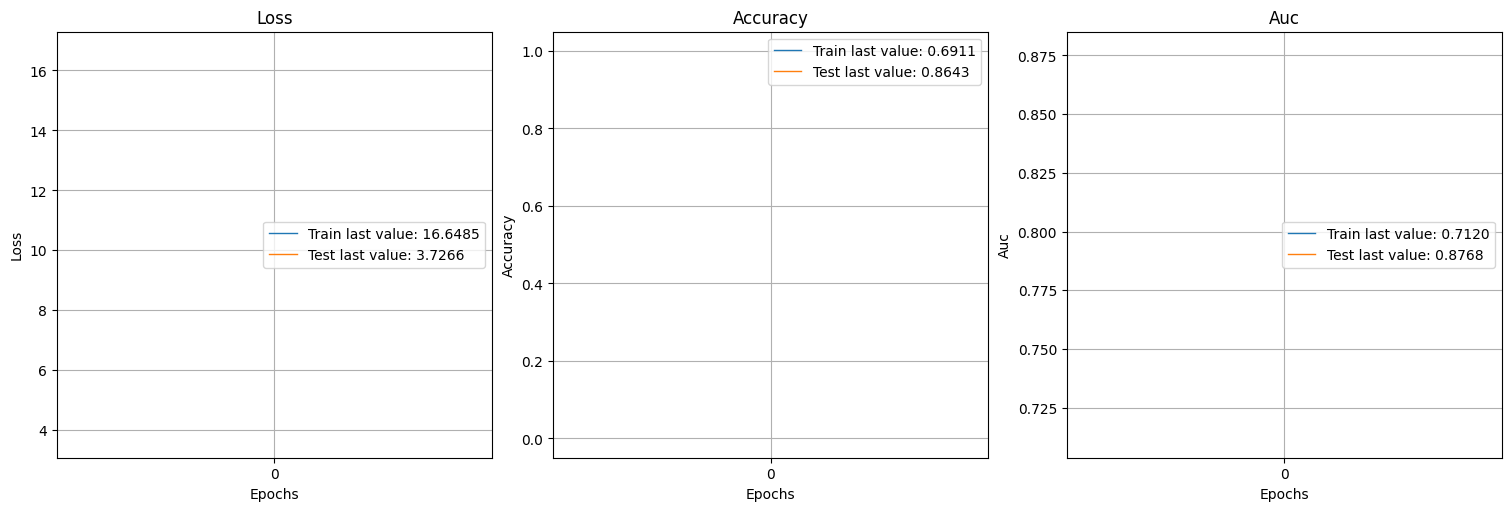

In [8]:


current_datetime = datetime.datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d-%H:%M:%S")

parent_folder_name = "logs"
os.makedirs(parent_folder_name, exist_ok=True)
nested_folder_name = os.path.join(parent_folder_name, formatted_datetime)
os.makedirs(nested_folder_name, exist_ok=True)

file_path = os.path.join(nested_folder_name, "output.txt")
with open(file_path, "w") as file:
    file.write(f"{history.history}\n")
    file.write(f"{results}\n")
    file.write(f"{platform.uname()._asdict()}\n")
print(results)
print(history.history)
plot_history(history, path=f"logs/{formatted_datetime}/history_plot.png")

# serialize model to JSON
model_json = phase1_model.to_json()
with open(f"logs/{formatted_datetime}/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
phase1_model.save_weights(f"logs/{formatted_datetime}/model.h5")
print("Saved model to disk")


In [10]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
